## Feature Evaluation
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Table of Contents

* [1.1 Environment Setup](#env-setup)
    * [1.1.1 Importing Modules](#imports)
    * [1.1.2 Display Settings](#display-setup)
    * [1.1.3 Load Data](#read-file)
    * [1.1.4 Model Features](#features)
<br><br>
* [1.2 Evaluation of Features](#eval-section)
    * [1.2.1 Roof Material Evaluation](#eval-roof)
    * [1.2.2 Fence Quality Evaluation](#eval-fence)

### 1.1 Environment Setup  <a class="anchor" id="env-setup"></a>

#### 1.1.1 Importing Modules<a class="anchor" id="imports"></a>

In [1]:
# import modules
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML
import warnings
import statsmodels.formula.api as smf
from scipy import stats
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

#### 1.1.2 Display Settings<a class="anchor" id="display-setup"></a>

In [2]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

#### 1.1.3 Load data<a class="anchor" id="read-file"></a>

In [3]:
# Load cleaned data - see "Data Cleansing.ipynb"
dataset = pd.read_csv('../data/Prep_Data.csv')
dataset_encoded = pd.read_csv('../data/Data_Encoded.csv')

#### 1.1.4 Features for Model (Including Target Variable)<a class="anchor" id="features"></a>

In [4]:
model_features = ['SalePrice','TotalBsmtSF', 'OverallQual', 'YearBuilt', 'log10_GrLivArea', 'OverallCond', 'log10_LotArea', 'BsmtUnfSF']

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.5 Evaluating Overall Quality, Fence, and Roof<a class="anchor" id="eval-section"></a>

#### Evaluation Roof Material<a class="anchor" id="eval-roof"></a>

<h4>Roof material</h4>
<p>&nbsp;</p>
<table style="border-collapse: collapse; width: 46.0227%; height: 162px;" border="1">
<thead>
<tr style="border-style: ridge; height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: center;"><strong>Abbreviation</strong></td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: center;"><strong>Material</strong></td>
</tr>
</thead>
<tbody>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; ClyTile</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Clay or Tile</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; CompShg</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Standard (Composite) Shingle</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Membran</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Membrane</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Metal</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Metal</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Roll</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Roll</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Tar&amp;Grv</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Gravel &amp; Tar</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; WdShake</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Wood Shakes</td>
</tr>
<tr style="height: 18px;">
<td style="width: 3.50375%; height: 18px; border-style: ridge; text-align: left;">&nbsp; WdShngl</td>
<td style="width: 9.18553%; height: 18px; border-style: ridge; text-align: left;">Wood Shingles</td>
</tr>
</tbody>
</table>

In [5]:
# dataset.groupby('RoofMatl').size()
dataset[dataset['SalePrice']>=500000].groupby('RoofMatl').size()

RoofMatl
CompShg    7
WdShngl    1
dtype: int64

In [6]:
roof_matl_dict = ({"ClyTile":"Clay or Tile","CompShg":"Standard (Composite) Shingle","Membran":"Membrane",
                   "Metal":"Metal","Roll":"Roll","Tar&Grv":"Gravel & Tar","WdShake":"Wood Shakes",
                   "WdShngl":"Wood Shingles",})

In [7]:
roofmatl_count = dataset.groupby(['RoofMatl']).agg({"RoofMatl":"count"})
roofmatl_count.columns = ['Number of Houses']
roofmatl_count['Percentage of Houses'] = roofmatl_count['Number of Houses']/dataset.shape[0]*100
roofmatl_count.reset_index(inplace=True)
roofmatl_count.columns=["Roof Material",'Number of Houses','Percentage of Houses']
roofmatl_count['Roof Material'].replace(roof_matl_dict, inplace=True)

#### Percentage of Houses for each Roof Material

In [8]:
display(roofmatl_count.style.applymap(lambda x: 'color: red' if (x<1.0) else 'color: black', subset=['Percentage of Houses']).hide_index())

Roof Material,Number of Houses,Percentage of Houses
Standard (Composite) Shingle,2381,98.673850
Membrane,1,0.041442
Metal,1,0.041442
Roll,1,0.041442
Gravel & Tar,15,0.621633
Wood Shakes,7,0.290095
Wood Shingles,7,0.290095


<ul>
<li>Approximately 99% of the houses in our dataset have Standard Composite Shingle on their roof. It is not possible to see a pattern to determine if a different roof materials would add or subtract value from the base price of the house.</li>
</ul>

In hope of getting a better understanding of when did different roof materials were used we took a look at the construction year of the houses in the dataset. 

In [9]:
# Evaluating the YearBuilt variable for each roof materical
df_roof_temp = dataset.groupby('RoofMatl').agg({"YearBuilt":["min","max","mean"]}).reset_index()
df_roof_temp.columns = ['Roof Material','Minimum(Year Built)', 'Maximum(Year Built)', 'Average(Year Built)']
df_roof_temp['Roof Material'].replace(roof_matl_dict, inplace=True)
df_roof_temp['Average(Year Built)'] = df_roof_temp['Average(Year Built)'].astype('int32')
df_roof_temp.style.hide_index()

Roof Material,Minimum(Year Built),Maximum(Year Built),Average(Year Built)
Standard (Composite) Shingle,1872,2010,1969
Membrane,1954,1954,1954
Metal,1969,1969,1969
Roll,1948,1948,1948
Gravel & Tar,1940,2004,1963
Wood Shakes,1967,1993,1979
Wood Shingles,1892,1994,1966


Houses built after 1990

In [10]:
temp=pd.DataFrame(dataset[dataset['YearBuilt']>=1990].groupby('RoofMatl').size()).reset_index()
temp.columns = ['Roof Material', 'Number of Houses']
temp['Percentage of Houses']=round(temp['Number of Houses'] / temp['Number of Houses'].sum() * 100,2)
temp.style.hide_index()

Roof Material,Number of Houses,Percentage of Houses
CompShg,833,99.640000
Tar&Grv,1,0.120000
WdShake,1,0.120000
WdShngl,1,0.120000


Summary: it is clear from the data analyzed that the most prominent roof material is standard shingles. Should the house roof material requires replacement we recommend to use standard shingles. We are not able to determine from the data available if choosing other materials would increase or decrease the value of the house.

In [11]:
# Dataset of Model Features + dummified Roof Material features
df_roof = pd.concat([dataset_encoded[model_features],pd.get_dummies(dataset['RoofMatl'])], axis=1)
df_roof.rename(columns={"Tar&Grv":"TarGrv"}, inplace=True)

In [12]:
# Model to evaluate roof material
mlr_model_roof = LinearRegression()
mlr_model_roof.fit(df_roof.drop(columns=['SalePrice']), np.log10(df_roof['SalePrice']))
mlr_model_roof.score(df_roof.drop(columns=['SalePrice']), np.log10(df_roof['SalePrice']))

0.9110307118929295

In [13]:
# Create a list of observations to predict the SalePrice (only house with WdShae and WdShngl)
df_roof_test = df_roof[(df_roof['WdShngl']==1) | (df_roof['WdShake']==1)]
df_roof_test.reset_index(drop=True, inplace=True)

In [14]:
# Predict SalePrice (7 WdShake and 7 WdShngl)
for i,y_hat in enumerate(mlr_model_roof.predict(df_roof_test.drop(columns='SalePrice'))):
    print(10**y_hat,' - ', df_roof_test.loc[i,'SalePrice'],' = ', 10**y_hat - df_roof_test.loc[i,'SalePrice'])

203526.99481187595  -  190000  =  13526.99481187595
408806.2348396561  -  385000  =  23806.2348396561
352754.0238223714  -  278000  =  74754.02382237138
674276.2040086172  -  755000  =  -80723.7959913828
207237.13545162432  -  192000  =  15237.135451624315
302617.54035789525  -  292500  =  10117.540357895254
283405.17778606154  -  279000  =  4405.17778606154
270801.95340389886  -  280000  =  -9198.046596101136
239344.33646652396  -  260000  =  -20655.663533476036
378725.1986333993  -  475000  =  -96274.80136660067
243346.85538759464  -  287500  =  -44153.14461240536
178771.0252634896  -  168500  =  10271.025263489602
244739.69457640135  -  242000  =  2739.694576401351
241882.8654269205  -  228000  =  13882.8654269205


In [15]:
df_roof_test['WdShake']=0
df_roof_test['WdShngl']=0
df_roof_test['CompShg']=1

In [16]:
# Predict SalePrice (7 WdShake and 7 WdShngl)
for i,y_hat in enumerate(mlr_model_roof.predict(df_roof_test.drop(columns='SalePrice'))):
    print(10**y_hat,' - ', df_roof_test.loc[i,'SalePrice'],' = ', 10**y_hat - df_roof_test.loc[i,'SalePrice'])

209503.01402927993  -  190000  =  19503.014029279933
375382.61146566115  -  385000  =  -9617.388534338854
323913.17788829544  -  278000  =  45913.17788829544
619147.9990738992  -  755000  =  -135852.00092610077
213322.0929048771  -  192000  =  21322.092904877092
311503.0851888102  -  292500  =  19003.08518881019
260234.22999394502  -  279000  =  -18765.770006054983
248661.43369518127  -  280000  =  -31338.566304818727
246372.03495744325  -  260000  =  -13627.965042556752
347760.9732312865  -  475000  =  -127239.02676871349
250492.07701107158  -  287500  =  -37007.92298892842
164154.86995721492  -  168500  =  -4345.13004278508
251925.81315198413  -  242000  =  9925.813151984126
248985.10094849407  -  228000  =  20985.100948494073


<hr>

#### Fence Quality Evaluation<a class="anchor" id="eval-fence"></a>

<p><strong>Fence Quality</strong></p>
<table style="border-collapse: collapse; width: 44.472%; height: 103px;" border="1">
<thead>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;"><em><strong>Rating</strong></em></td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;"><em><strong>Abbre</strong></em></td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: center;"><em><strong>Description</strong></em></td>
</tr>
</thead>
<tbody>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">4</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">GdPrv</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Good Privacy</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">3</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">MnPrv</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Minimum Privacy</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">2</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">GdWo</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; Good Wood</td>
</tr>
<tr style="height: 13px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">1</td>
<td style="width: 8.26072%; height: 13px; border-style: ridge; text-align: center;">MnWw</td>
<td style="width: 38.401%; height: 13px; border-style: ridge; text-align: left;">&nbsp; Minimum Wood/Wire</td>
</tr>
<tr style="height: 18px;">
<td style="width: 8.16763%; border-style: ridge; text-align: center;">0</td>
<td style="width: 8.26072%; height: 18px; border-style: ridge; text-align: center;">NA</td>
<td style="width: 38.401%; height: 18px; border-style: ridge; text-align: left;">&nbsp; No Fence</td>
</tr>
</tbody>
</table>

In [17]:
roof_fence_dict = ({0:"No Fence",1:"Minimum Wood/Wire",2:"Good Wood",3:"Minimum Privacy",4:"Good Privacy"})

#### Number of Houses with a Fence

In [18]:
df_fence = (dataset.groupby('Fence').agg(count=pd.NamedAgg(column="Fence", aggfunc="count"))/dataset.shape[0]*100).reset_index()
df_fence.columns=['Fence Rating','Percentage of Houses']
df_fence['Fence Rating'].replace(roof_fence_dict, inplace=True)
df_fence.style.hide_index()

Fence Rating,Percentage of Houses
No Fence,79.196022
Minimum Wood/Wire,0.414422
Good Wood,4.102777
Minimum Privacy,11.852466
Good Privacy,4.434314


#### Trend since 1990

In [19]:
df_fence_temp = dataset_encoded.copy()
df_fence_temp = pd.concat([df_fence_temp.filter(model_features), dataset['Fence']],axis=1)
df_fence_temp.Fence.replace(roof_fence_dict, inplace=True)
temp=pd.DataFrame(df_fence_temp[df_fence_temp['YearBuilt']>=1990].groupby('Fence').size()).reset_index()
temp.columns=['Fence Rating', 'Number of Houses']
temp['Percentage of Houses']=temp['Number of Houses'] / temp['Number of Houses'].sum() * 100
temp.sort_values(by='Percentage of Houses', ascending=False).style.hide_index()

Fence Rating,Number of Houses,Percentage of Houses
No Fence,792,94.736842
Good Privacy,25,2.990431
Minimum Privacy,15,1.794258
Good Wood,4,0.478469


#### Using a Linear Model (Excluding No Fence Observations)

#### MLR Model
Including previously determined 7 features + 4 Features from Fence


$\hat{Y}\;  =\;  \hat{\beta}_{0}\;  + \; \hat{\beta}_{1}\,log_{10}(GrLivArea)\;  + \; \hat{\beta}_{2}\,(YearBuilt)\; +\; \hat{\beta}_{3}\,(TotalBsmtSF)\; +\; \hat{\beta}_{4}\,Log_{10}(LotArea)\\ \;\;\;\;\;\;\;\;\;\;\;\;\;+ \hat{\beta}_{5}\,(BsmtUnfSF)\; +\; \hat{\beta}_{6}\,(OverallCond)\; + \;\hat{\beta}_{7}\,(OverallQual)\; +\; \hat{\beta}_{6}\,(\color{blue}{Good Privacy})\;\\
\;\;\;\;\;\;\;\;\;\;\;\;\;+ \;\hat{\beta}_{7}\,(\color{blue}{Minimum Privacy})\; +\; \hat{\beta}_{6}\,(\color{blue}{Good Wood})\; + \;\hat{\beta}_{7}\,(\color{blue}{Minimum Wood/Wire})\; +\; \epsilon $


In [20]:
# df_fence_temp_test = pd.concat([df_fence_temp[df_fence_temp['Fence']!='No Fence'],
#                                df_fence_temp[df_fence_temp['Fence']=='No Fence'].head(125)],
#                               axis = 0)
df_fence_temp_test = df_fence_temp[df_fence_temp['Fence']!='No Fence']
df_fence_temp_test = pd.concat([df_fence_temp_test[model_features],
                                pd.get_dummies(df_fence_temp_test['Fence'])],
                               axis = 1)

In [21]:
# Model to evaluate roof material
mlr_model_fence = LinearRegression()
mlr_model_fence.fit(df_fence_temp_test.drop(columns=['SalePrice']), np.log10(df_fence_temp_test['SalePrice']))
print("R-squared: ", mlr_model_fence.score(df_fence_temp_test.drop(columns=['SalePrice']), np.log10(df_fence_temp_test['SalePrice'])))


R-squared:  0.8652079868146181


In [22]:
# for i, feature in enumerate(df_fence_temp_test.drop(columns=['SalePrice']).columns):
#    print(feature,' - ',np.round(mlr_model_fence.coef_[i],4))
    

In [23]:
# 5 record for each fence type. Total = 20
df_fence_temp_test = pd.concat([df_fence_temp_test[df_fence_temp_test['Minimum Wood/Wire']==1].head(5),
           df_fence_temp_test[df_fence_temp_test['Good Wood']==1].head(5),
           df_fence_temp_test[df_fence_temp_test['Good Privacy']==1].head(5),
           df_fence_temp_test[df_fence_temp_test['Minimum Privacy']==1].head(5)],
           #df_fence_temp_test[df_fence_temp_test['No Fence']==1].head(5)],
          axis=0)
df_fence_temp_test.reset_index(drop=True,inplace=True)

In [24]:
fence_values = {}
temp_list = []
#df_fence_temp_test['No Fence']=1
#df_fence_temp_test['Minimum Wood/Wire']=0
#df_fence_temp_test['Good Wood']=0
#df_fence_temp_test['Minimum Privacy']=0
#df_fence_temp_test['Good Privacy']=0
#for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_temp_test.drop(columns=['SalePrice']))):
#    temp_list.append(int(10**coef_))
#fence_values['No Fence']=temp_list

In [25]:
df_fence_temp_test['Minimum Wood/Wire']=1
df_fence_temp_test['Good Wood']=0
df_fence_temp_test['Minimum Privacy']=0
df_fence_temp_test['Good Privacy']=0
temp_list = []
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_temp_test.drop(columns=['SalePrice']))):
    temp_list.append(int(10**coef_))
fence_values['Minimum Wood/Wire']=temp_list

In [26]:
df_fence_temp_test['Good Wood']=1
df_fence_temp_test['Minimum Wood/Wire']=0
temp_list = []
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_temp_test.drop(columns=['SalePrice']))):
    temp_list.append(int(10**coef_))
fence_values['Good Wood']=temp_list

In [27]:
df_fence_temp_test['Good Wood']=0
df_fence_temp_test['Minimum Privacy']=1
temp_list = []
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_temp_test.drop(columns=['SalePrice']))):
    temp_list.append(int(10**coef_))
fence_values['Minimum Privacy']=temp_list

In [28]:
df_fence_temp_test['Minimum Privacy']=0
df_fence_temp_test['Good Privacy']=1
temp_list = []
for i, coef_ in enumerate(mlr_model_fence.predict(df_fence_temp_test.drop(columns=['SalePrice']))):
    temp_list.append(int(10**coef_))
fence_values['Good Privacy']=temp_list

#### Predicted Sale Price for 20 Houses with Fences.

In [29]:
results = pd.DataFrame(fence_values)
results.style.hide_index()

Minimum Wood/Wire,Good Wood,Minimum Privacy,Good Privacy
132486,136309,136380,139268
112295,115536,115596,118044
117293,120678,120741,123298
154103,158550,158633,161992
132607,136434,136505,139395
139400,143422,143497,146536
67098,69034,69070,70533
149418,153730,153810,157067
168696,173564,173655,177332
126707,130364,130432,133194


In [30]:
data=pd.DataFrame(results.mean()).reset_index()
data.columns=['FenceRating','AverageSalePrice']
#data['PercentageChange'] = (data['AverageSalePrice'].pct_change() * 100).fillna(0)

In [31]:
data.style.hide_index()

FenceRating,AverageSalePrice
Minimum Wood/Wire,155466.800000
Good Wood,159953.100000
Minimum Privacy,160036.600000
Good Privacy,163425.550000


In [32]:
(data['AverageSalePrice'].pct_change() * 100).fillna(0)

0    0.000000
1    2.885696
2    0.052203
3    2.117609
Name: AverageSalePrice, dtype: float64

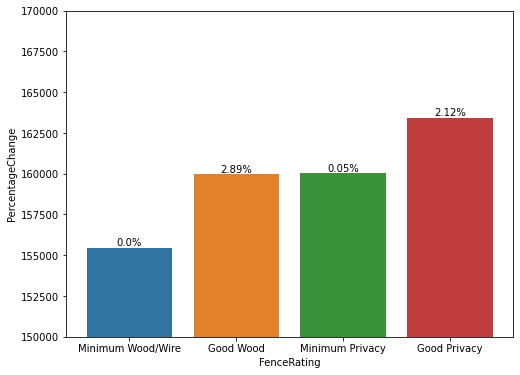

In [33]:
data=pd.DataFrame(results.mean()).reset_index()
data.columns=['FenceRating','AverageSalePrice']
data['PercentageChange'] = (data['AverageSalePrice'].pct_change() * 100).fillna(0)
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim([150000,170000])
sns_plot = sns.barplot(x='FenceRating', y='AverageSalePrice', data=data, ax=ax)
ax.set(xlabel='Fence Ratings',ylabel='Average Sale Price')#, title="Average Sale Price of Houses with a Fence")
for index, row in data.iterrows():
    sns_plot.text(row.name,row.AverageSalePrice, str(round(row.PercentageChange,2))+"%", color='black', ha="center", va="bottom")

sns.lineplot(x='FenceRating', y='PercentageChange', data=data, ax=ax)

    

#### Conclusion:
<ul>
<li>It is not possible given the data to determine how much value would be added to a house by installing a new fence. 80% of the houses in the dataset do not have fences.</li>
<li>If we take a look at only those houses with a fence we can see a trend:
<ul>
<li>Houses with Minimum Wood/Wire fences have the lowest values among houses with a fence.</li>
<li>Replacing a Minimum Wood/Wire fence with a Good Wood or Minimum Privacy fence can yield almost a 3% increase in the value of the house.</li>
<li>The best gains were observed when a Minimum Wood/Wire fence was replaced by a Good Privacy fence, a ~5% increase in the value of the house. For example, a house priced at $150,000.00 with a Minimum Wood/Wire fence, according to the data available, can increase its sale price to \$157,500.00 by replacing the existing fence for a Good Privacy fence.</li>
</ul>
</li>
<li>It is clear from the data that most houses do not have a fence. Adding a fence to a house that does not have one may not be recommended and should be considered case by case.&nbsp;</li>
</ul>